In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import sys

from PIL import Image
from IPython.display import display

In [8]:
cv.__version__

'4.4.0'

In [17]:
def on_mouse(event, x, y, flags, params):
    if event == cv.CV_EVENT_LBUTTONDOWN:
        print('Start Mouse Position: ' + str(x) + ', ' + str(y))
        s_box = x, y
        boxes.append(s_box)

In [18]:
def region_growing(img, seed):
    #Parameters for region growing
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    region_threshold = 0.2
    region_size = 1
    intensity_difference = 0
    neighbor_points_list = []
    neighbor_intensity_list = []

    #Mean of the segmented region
    region_mean = img[seed]

    #Input image parameters
    height, width = img.shape
    image_size = height * width

    #Initialize segmented output image
    segmented_img = np.zeros((height, width, 1), np.uint8)

    #Region growing until intensity difference becomes greater than certain threshold
    while (intensity_difference < region_threshold) & (region_size < image_size):
        #Loop through neighbor pixels
        for i in range(4):
            #Compute the neighbor pixel position
            x_new = seed[0] + neighbors[i][0]
            y_new = seed[1] + neighbors[i][1]

            #Boundary Condition - check if the coordinates are inside the image
            check_inside = (x_new >= 0) & (y_new >= 0) & (x_new < height) & (y_new < width)

            #Add neighbor if inside and not already in segmented_img
            if check_inside:
                if segmented_img[x_new, y_new] == 0:
                    neighbor_points_list.append([x_new, y_new])
                    neighbor_intensity_list.append(img[x_new, y_new])
                    segmented_img[x_new, y_new] = 255

        #Add pixel with intensity nearest to the mean to the region
        distance = abs(neighbor_intensity_list-region_mean)
        pixel_distance = min(distance)
        index = np.where(distance == pixel_distance)[0][0]
        segmented_img[seed[0], seed[1]] = 255
        region_size += 1

        #New region mean
        region_mean = (region_mean*region_size + neighbor_intensity_list[index])/(region_size+1)

        #Update the seed value
        seed = neighbor_points_list[index]
        #Remove the value from the neighborhood lists
        neighbor_intensity_list[index] = neighbor_intensity_list[-1]
        neighbor_points_list[index] = neighbor_points_list[-1]

    return segmented_img

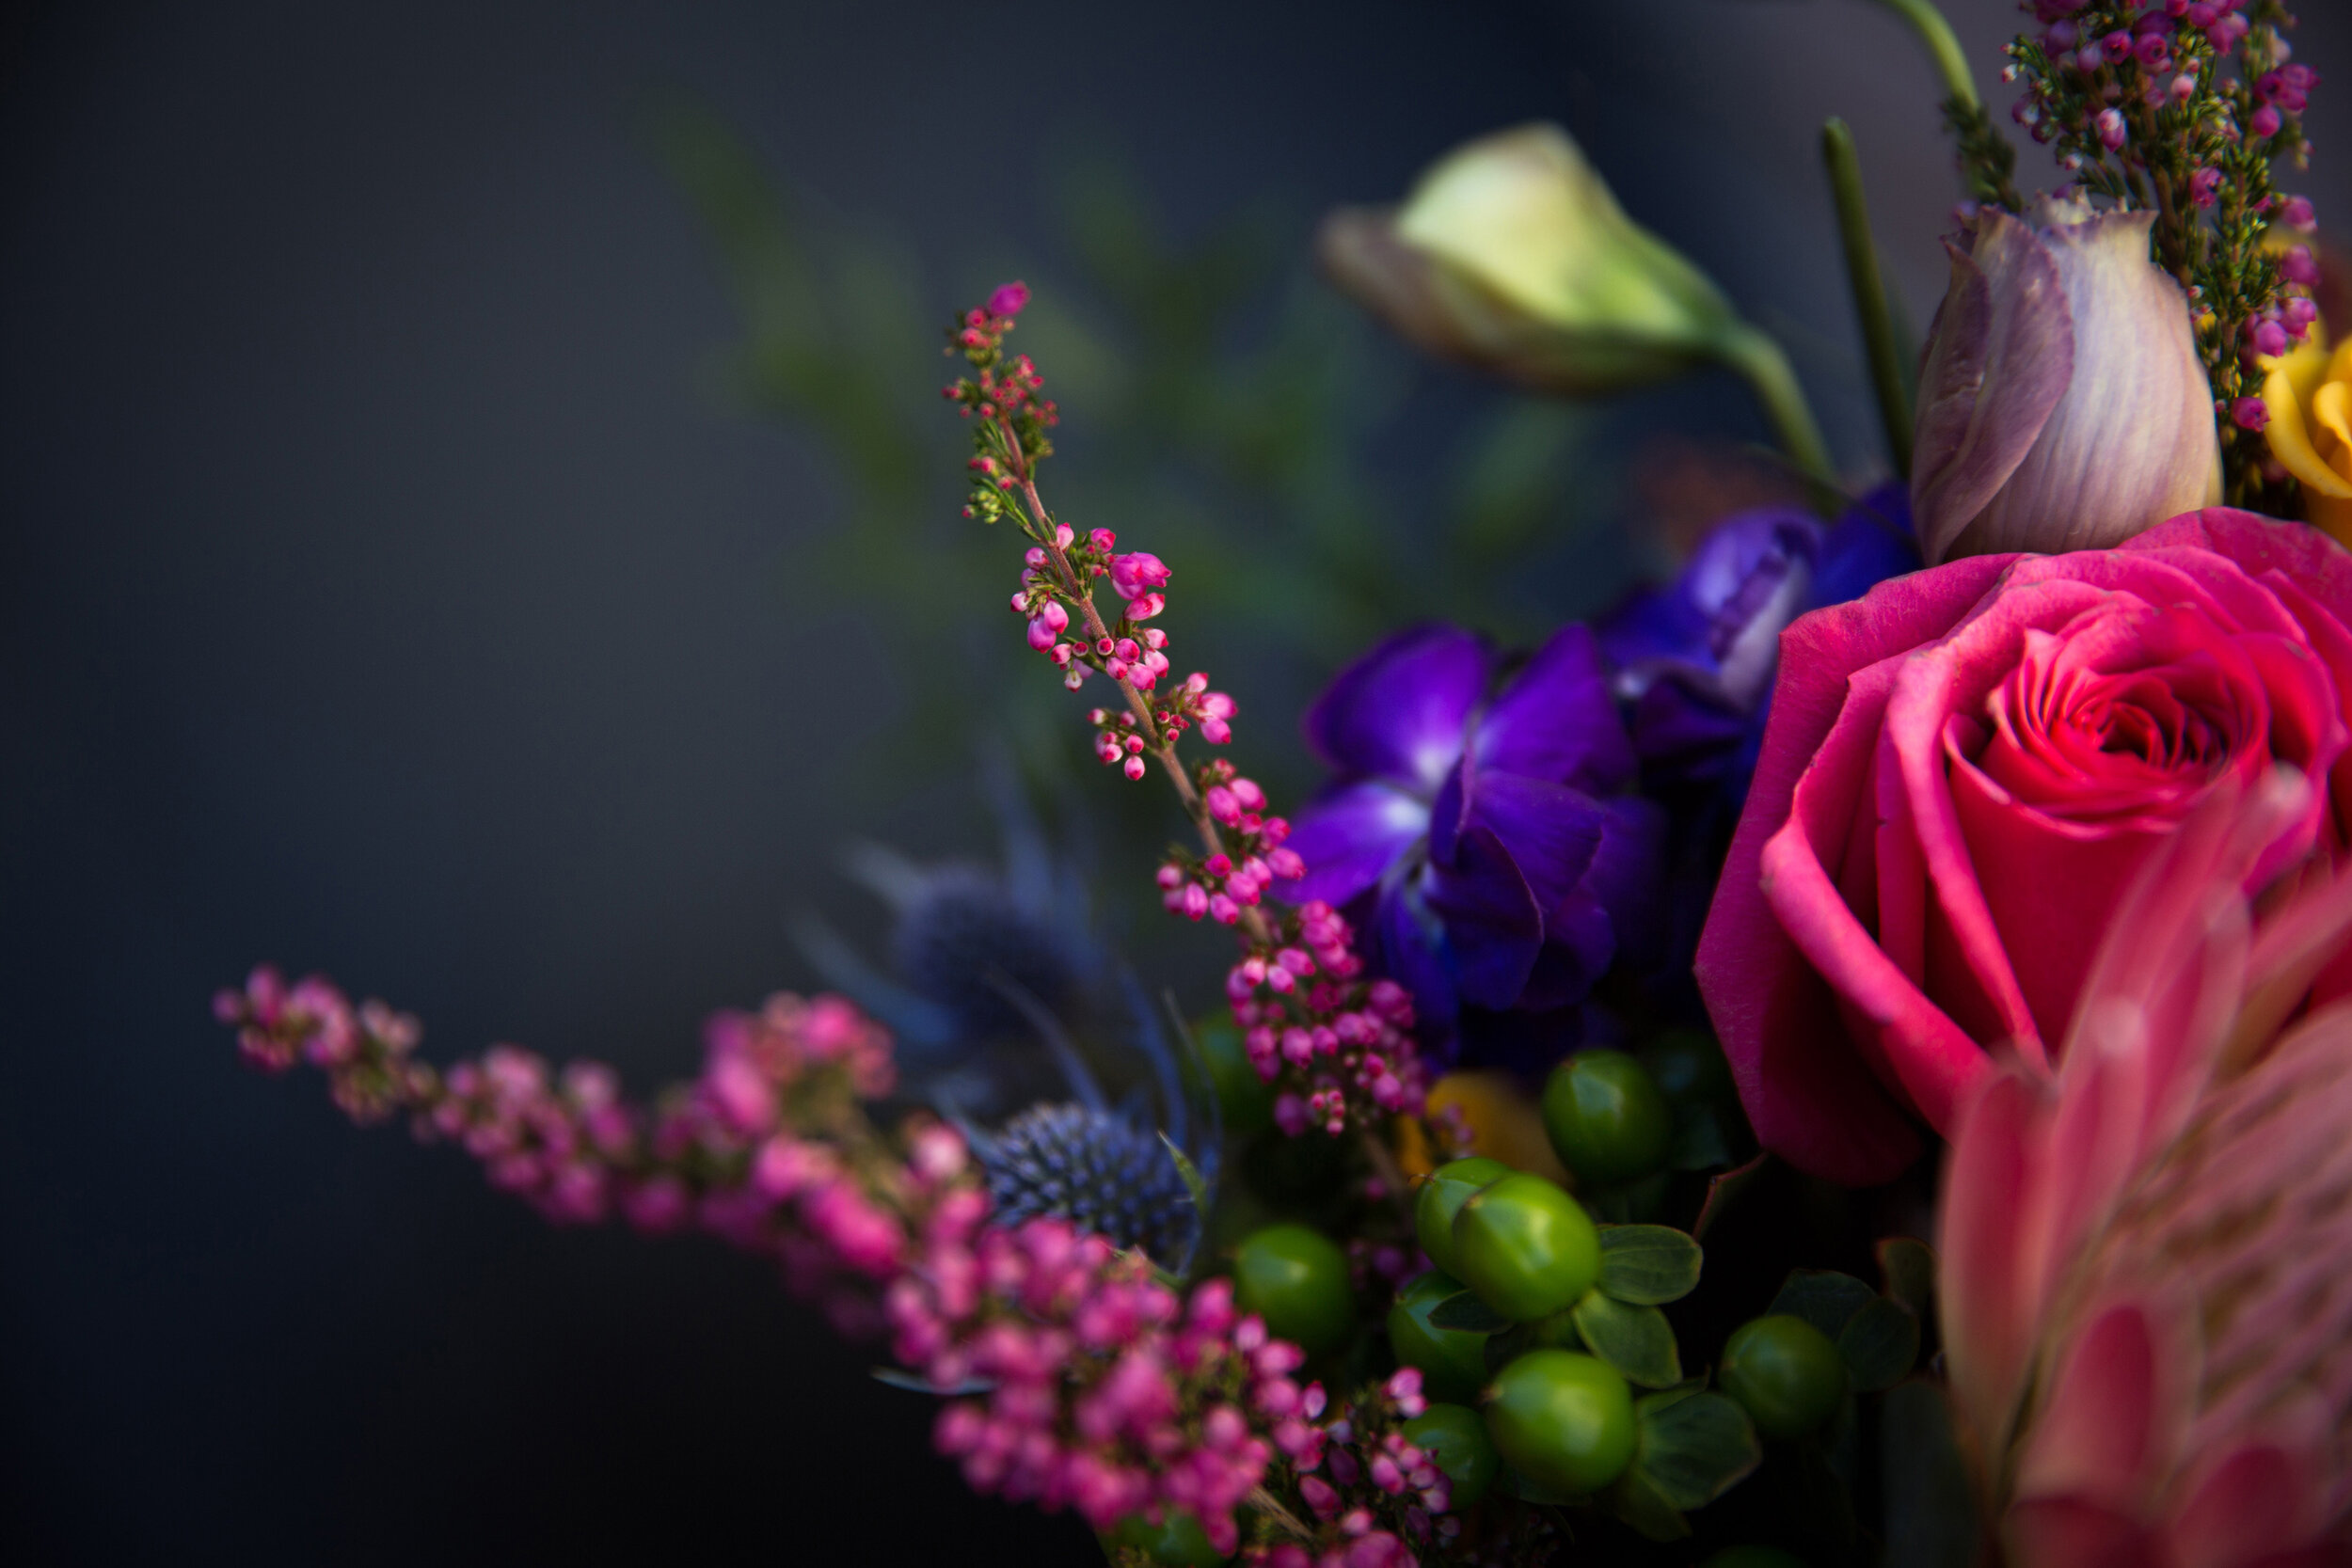

In [15]:
img = cv.imread('./data/flower_00.jpg')
resized = cv.resize(img,(512,512))
resized = cv.cvtColor(img, cv.COLOR_BGR2RGB)
display(Image.fromarray(resized))

In [ ]:
print "Starting region growing based on last click"
seed = boxes[-1]
cv2.imshow('input', region_growing(resized, seed))
print "Done. Showing output now"